In [1]:
import os
import numpy as np
import pandas as pd
import pickle

In [2]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
INPUT_DIR = '../input/ieee-fraud-detection-dataprocessing'
data = {}
files = os.listdir(INPUT_DIR)
for file in files:
    if 'Xtrain' in file:
        data['Xtrain'] = INPUT_DIR + '/' + file
    if 'Ytrain' in file:
        data['Ytrain'] = INPUT_DIR + '/' + file
    if 'Xtest' in file:
        data['Xtest'] = INPUT_DIR + '/' + file
data

{'Xtest': '../input/ieee-fraud-detection-dataprocessing/Xtest-IEEE-CIS-Fraud-Detection.data',
 'Xtrain': '../input/ieee-fraud-detection-dataprocessing/Xtrain-IEEE-CIS-Fraud-Detection.data',
 'Ytrain': '../input/ieee-fraud-detection-dataprocessing/Ytrain-IEEE-CIS-Fraud-Detection.data'}

In [5]:
Xtrain = pickle.load(open(data['Xtrain'], 'rb'))
Xtrain.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_34_match_status:1,id_34_match_status:2,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0.000214,0.000000,0.000628,0.0,0.000343,0.0007,0.000176,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2987001,0.000214,0.000000,0.000314,0.0,0.000343,0.0007,0.000176,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2987002,0.000214,0.000000,0.000314,0.0,0.000343,0.0007,0.000176,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2987003,0.000427,0.000000,0.000314,0.0,0.008568,0.0007,0.000878,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2987004,0.000214,0.000307,0.000314,0.0,0.000343,0.0007,0.000176,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [6]:
Ytrain = pickle.load(open(data['Ytrain'], 'rb'))
Ytrain.head()

TransactionID
2987000    0
2987001    0
2987002    0
2987003    0
2987004    0
Name: isFraud, dtype: int64

In [7]:
Xtest = pickle.load(open(data['Xtest'], 'rb'))
Xtest.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_34_match_status:1,id_34_match_status:2,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,0.001281,0.0,0.001569,0.000314,0.039398,0.0042,0.001054,0.0,0.0,0.008598,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663550,0.000640,0.0,0.000314,0.000314,0.004112,0.0014,0.000351,0.0,0.0,0.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663551,0.000427,0.0,0.000628,0.000000,0.007538,0.0014,0.000351,0.0,0.0,0.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663552,0.001067,0.0,0.000628,0.000000,0.002399,0.0028,0.000351,0.0,0.0,0.002865,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663553,0.001281,0.0,0.001882,0.000000,0.004799,0.0042,0.001054,0.0,0.0,0.005730,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [8]:
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [10]:
earlystop = EarlyStopping(patience=15, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(patience=5, verbose=1, cooldown=10)

callbacks = [earlystop, reduce_lr]

In [11]:
clf = Sequential()

clf.add(Dense(units=400, activation='relu', input_dim=598))
clf.add(Dropout(rate=0.1))

clf.add(Dense(units=400, activation='relu'))
clf.add(Dropout(rate=0.1))

clf.add(Dense(units=1, activation='sigmoid'))

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               239600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 401       
Total params: 400,401
Trainable params: 400,401
Non-trainable params: 0
_______________

In [12]:
history = clf.fit(Xtrain, Ytrain, epochs=100, batch_size=64, validation_data=(Xval, Yval), callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 1025778 samples, validate on 113976 samples
Epoch 1/100
1025778/1025778 [==============================] - 61s 60us/step - loss: 0.4052 - acc: 0.8121 - val_loss: 0.3516 - val_acc: 0.8431
Epoch 2/100
1025778/1025778 [==============================] - 58s 57us/step - loss: 0.3353 - acc: 0.8485 - val_loss: 0.2977 - val_acc: 0.8712
Epoch 3/100
1025778/1025778 [==============================] - 58s 57us/step - loss: 0.2972 - acc: 0.8674 - val_loss: 0.2695 - val_acc: 0.8856
Epoch 4/100
1025778/1025778 [==============================] - 58s 57us/step - loss: 0.2696 - acc: 0.8811 - val_loss: 0.2419 - val_acc: 0.8975
Epoch 5/100
1025778/1025778 [==============================] - 59s 57us/step - loss: 0.2509 - acc: 0.8902 - val_loss: 0.2110 - val_acc: 0.9152
Epoch 6/100
1025778/1025778 [==============================] - 58s 57us/step - loss: 0.2357 - acc: 0.8977 - val_loss: 0.2025 - val_acc: 0.9165
Epoch 7/100
1025778/1025778 [============

In [13]:
clf.save('clf_ANN_01.h5')

In [15]:
import matplotlib.pyplot as plt

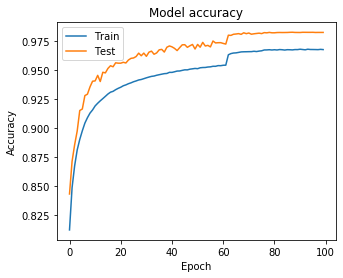

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(5, 4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

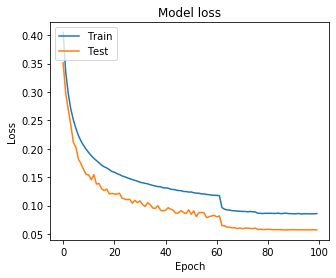

In [17]:
# Plot training & validation loss values
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
Ytrain_ = clf.predict(Xtrain) > 0.5
Yval_ = clf.predict(Xval) > 0.5

In [19]:
print('Training Results:')
print('=======================================')
print('Accuracy Score:', accuracy_score(Ytrain, Ytrain_))
print()
print('Log loss:', log_loss(Ytrain, Ytrain_))
print()
print('ROC_Accuracy_Score:', roc_auc_score(Ytrain, Ytrain_))
print()
print('Precision_Score:', precision_score(Ytrain, Ytrain_))
print()
print('Recall_Score:', recall_score(Ytrain, Ytrain_))
print()
print('F1_Score:', f1_score(Ytrain, Ytrain_))
print()
print('Confusion_Matrix:')
print(confusion_matrix(Ytrain, Ytrain_))
print()
print('Classification Report:')
print(classification_report(Ytrain, Ytrain_))
print()
print('Validation Results:')
print('=======================================')
print('Accuracy Score:', accuracy_score(Yval, Yval_))
print()
print('Log loss:', log_loss(Yval, Yval_))
print()
print('ROC_Accuracy_Score:', roc_auc_score(Yval, Yval_))
print()
print('Precision_Score:', precision_score(Yval, Yval_))
print()
print('Recall_Score:', recall_score(Yval, Yval_))
print()
print('F1_Score:', f1_score(Yval, Yval_))
print()
print('Confusion_Matrix:')
print(confusion_matrix(Yval, Yval_))
print()
print('Classification Report:')
print(classification_report(Yval, Yval_))
print()

Training Results:
Accuracy Score: 0.9879242877113762

Log loss: 0.41708874440318283

ROC_Accuracy_Score: 0.9879259330330988

Precision_Score: 0.9793124983237741

Recall_Score: 0.9969032459364854

F1_Score: 0.9880295824994371

Confusion_Matrix:
[[502184  10799]
 [  1588 511207]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    512983
           1       0.98      1.00      0.99    512795

    accuracy                           0.99   1025778
   macro avg       0.99      0.99      0.99   1025778
weighted avg       0.99      0.99      0.99   1025778


Validation Results:
Accuracy Score: 0.982654242998526

Log loss: 0.599113836324472

ROC_Accuracy_Score: 0.982630765439746

Precision_Score: 0.9693701981226895

Recall_Score: 0.9968641603307522

F1_Score: 0.9829249544406347

Confusion_Matrix:
[[55096  1798]
 [  179 56903]]

Classification Report:
              precision    recall  f1-score   support

           0     